In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("mikoajfish99/lions-or-cheetahs-image-classification")

print("Path to dataset files:", path)

100%|██████████| 71.3M/71.3M [00:00<00:00, 84.2MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/mikoajfish99/lions-or-cheetahs-image-classification/versions/1


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os
import glob
import cv2

In [3]:
import tensorflow as tf

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
print(os.listdir(os.path.join(path, "images")))

['Lions', 'Cheetahs']


In [6]:
SIZE = 224

In [7]:
images = []
labels = []

In [12]:
for directory_path in glob.glob(os.path.join(path, "images/*")):
    label = directory_path.split("/")[-1]
    print(label)

Lions
Cheetahs


In [13]:
for directory_path in glob.glob(os.path.join(path, "images/*")):
    label = directory_path.split("/")[-1]
    for img_path in glob.glob(os.path.join(directory_path, "*.jpg")):
        print(img_path)
        img = cv2.imread(img_path, cv2.IMREAD_COLOR)
        img = cv2.resize(img, (SIZE, SIZE))
        img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
        images.append(img)
        labels.append(label)

/root/.cache/kagglehub/datasets/mikoajfish99/lions-or-cheetahs-image-classification/versions/1/images/Lions/017aca08f66253f5.jpg
/root/.cache/kagglehub/datasets/mikoajfish99/lions-or-cheetahs-image-classification/versions/1/images/Lions/9b91ad0cc4a42193.jpg
/root/.cache/kagglehub/datasets/mikoajfish99/lions-or-cheetahs-image-classification/versions/1/images/Lions/13e2acb33f29b384.jpg
/root/.cache/kagglehub/datasets/mikoajfish99/lions-or-cheetahs-image-classification/versions/1/images/Lions/06c269f657184270.jpg
/root/.cache/kagglehub/datasets/mikoajfish99/lions-or-cheetahs-image-classification/versions/1/images/Lions/0f0e1c3f75d2a442.jpg
/root/.cache/kagglehub/datasets/mikoajfish99/lions-or-cheetahs-image-classification/versions/1/images/Lions/84fea0403c89c288.jpg
/root/.cache/kagglehub/datasets/mikoajfish99/lions-or-cheetahs-image-classification/versions/1/images/Lions/0a819239f85ddf93.jpg
/root/.cache/kagglehub/datasets/mikoajfish99/lions-or-cheetahs-image-classification/versions/1/im

In [14]:
images = np.array(images)
labels = np.array(labels)

In [15]:
X_train, X_test, y_train_labels, y_test_labels = train_test_split(images, labels, test_size=0.2, random_state=1)

In [16]:
print(len(X_train))
print(len(X_test))


160
40


In [17]:
print(X_train.shape)
print(X_test.shape)

(160, 224, 224, 3)
(40, 224, 224, 3)


In [18]:
#Encode labels from text to integers.
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(y_train_labels)
y_train = le.transform(y_train_labels)
le.fit(y_test_labels)
y_test = le.transform(y_test_labels)

In [19]:
print(y_train)

[0 0 0 1 1 1 0 1 0 0 1 0 0 1 1 0 0 0 0 0 0 1 1 1 1 1 0 0 1 1 1 1 0 0 0 0 1
 0 1 0 0 1 1 0 0 1 1 0 0 1 1 1 0 0 0 0 0 0 0 0 1 1 1 0 1 1 1 0 1 0 1 0 1 1
 1 0 1 0 1 1 1 1 0 0 0 1 0 0 0 1 1 1 0 0 0 1 0 1 0 0 0 0 0 0 1 1 1 0 0 1 1
 1 1 1 1 1 0 1 0 0 0 1 0 0 0 1 1 0 1 1 1 1 1 1 0 0 1 1 1 1 0 0 0 0 0 0 1 0
 1 0 1 0 0 0 1 0 0 1 0 1]


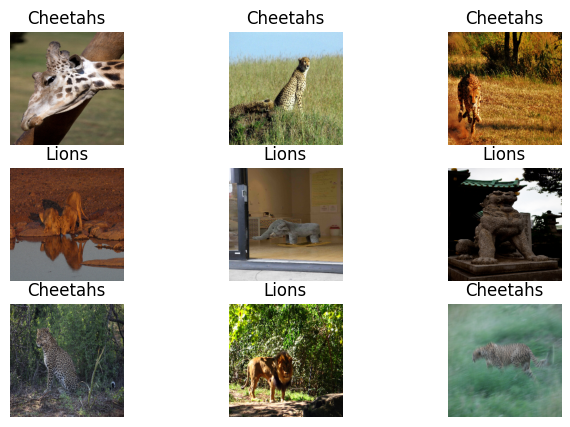

In [21]:

plt.figure(figsize=(8, 5))
for i, (images, label) in enumerate(zip(X_train, y_train_labels)):
    if i == 9:
      break
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images.astype("uint8"))
    plt.title(label)
    plt.axis("off")

In [22]:
preprocess_input = tf.keras.applications.resnet50.preprocess_input

In [23]:
IMG_SHAPE = (SIZE,SIZE) + (3,)
print(IMG_SHAPE)

(224, 224, 3)


In [24]:
base_model = tf.keras.applications.ResNet50(input_shape=IMG_SHAPE,
                                               include_top=False,
                                               weights='imagenet')

In [25]:
base_model.trainable = False

In [26]:
# Let's take a look at the base model architecture
base_model.summary()

Model: "resnet50"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 224, 224, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_pad (ZeroPadding2D) │ (None, 230, 230, 3)    │              0 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_conv (Conv2D)       │ (None, 112, 112, 64)   │          9,472 │ conv1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_bn                  │ (None, 112, 112, 64)   │            256 │ conv1_conv[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_relu (Activation)   │ (None, 112, 112, 64)   │              0 │ conv1_bn[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pad (ZeroPadding2D) │ (None, 114, 114, 64)   │              0 │ conv1_relu[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pool (MaxPooling2D) │ (None, 56, 56, 64)     │              0 │ pool1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_conv       │ (None, 56, 56, 64)     │          4,160 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_bn         │ (None, 56, 56, 64)     │            256 │ conv2_block1_1_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_relu       │ (None, 56, 56, 64)     │              0 │ conv2_block1_1_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_conv       │ (None, 56, 56, 64)     │         36,928 │ conv2_block1_1_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_bn         │ (None, 56, 56, 64)     │            256 │ conv2_block1_2_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_relu       │ (None, 56, 56, 64)     │              0 │ conv2_block1_2_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_conv       │ (None, 56, 56, 256)    │         16,640 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_3_conv       │ (None, 56, 56, 256)    │         16,640 │ conv2_block1_2_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├──────────────────────

 Total params: 23,587,712 (89.98 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 23,587,712 (89.98 MB)

In [27]:
# Normalize pixel values to between 0 and 1
X_train= preprocess_input(X_train)
X_test= preprocess_input(X_test)

In [28]:
from tqdm import tqdm  # For a progress bar (optional)
feature_extractor = []
batch_size = 32  # Experiment with different batch sizes
for i in tqdm(range(0, len(X_train), batch_size)):
    batch_features = base_model.predict(X_train[i : i + batch_size])
    feature_extractor.extend(batch_features)

feature_extractor = np.array(feature_extractor)

  0%|          | 0/5 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 10s 10s/step


 20%|██        | 1/5 [00:09<00:39,  9.80s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step


 40%|████      | 2/5 [00:15<00:22,  7.41s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step


 60%|██████    | 3/5 [00:25<00:17,  8.75s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step


 80%|████████  | 4/5 [00:36<00:09,  9.36s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step


100%|██████████| 5/5 [00:46<00:00,  9.30s/it]


In [29]:
print(feature_extractor.shape)

(160, 7, 7, 2048)


In [30]:
features = feature_extractor.reshape(feature_extractor.shape[0], -1)

In [32]:
print(features.shape)

(160, 100352)


In [33]:
X_for_RF = features

In [34]:
from sklearn.ensemble import RandomForestClassifier
RF_model = RandomForestClassifier(n_estimators = 50, random_state = 42)

In [35]:
RF_model.fit(X_for_RF, y_train)

RandomForestClassifier(n_estimators=50, random_state=42)

In [36]:
X_test_feature = base_model.predict(X_test)
X_test_features = X_test_feature.reshape(X_test_feature.shape[0], -1)

2/2 ━━━━━━━━━━━━━━━━━━━━ 13s 7s/step


In [38]:
print(X_test_features.shape)

(40, 100352)


In [39]:
prediction_RF = RF_model.predict(X_test_features)

In [40]:
prediction_RF = le.inverse_transform(prediction_RF)

In [44]:
import seaborn as sns
sns.set()

Accuracy =  0.875


<Axes: >

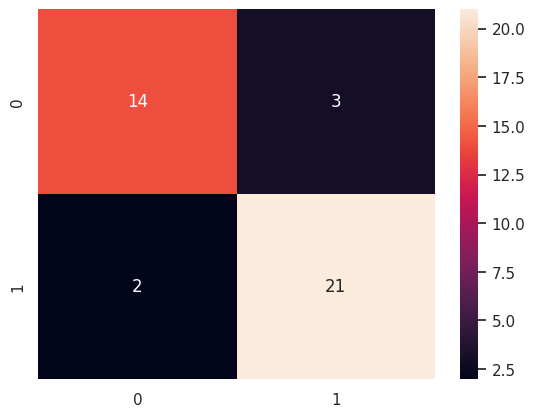

In [45]:
from sklearn import metrics
print ("Accuracy = ", metrics.accuracy_score(y_test_labels, prediction_RF))

#Confusion Matrix - verify accuracy of each class
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test_labels, prediction_RF)
#print(cm)
sns.heatmap(cm, annot=True)